In [1]:
import matplotlib.pyplot as plt

In [4]:
def approx_subset_sum_with_subset_graph(S, T, epsilon=0.01):
    L = [(0, [])]  # Each item: (sum, subset)
    all_steps = []  # For plotting

    for x in S:
        new_sums = [(sum_val + x, subset + [x]) for (sum_val, subset) in L]
        merged = merge_and_trim_with_subset_graph(L + new_sums, epsilon)
        L = [item for item in merged if item[0] <= T]

        # Save current step's sums for graph
        step_sums = [val[0] for val in L]
        all_steps.append((x, step_sums))

    max_sum, best_subset = max(L, key=lambda item: item[0])

    # Plotting
    plot_subset_sum_steps(all_steps, T)
    return max_sum, best_subset

In [3]:
def merge_and_trim_with_subset_graph(L, epsilon):
    L.sort()
    trimmed = [L[0]]
    for current in L[1:]:
        if current[0] > trimmed[-1][0] * (1 + epsilon):
            trimmed.append(current)
    return trimmed

In [5]:
def plot_subset_sum_steps(all_steps, T):
    plt.figure(figsize=(10, 6))
    for i, (x, sums) in enumerate(all_steps):
        plt.plot(sums, 'o-', label=f"Step {i+1} (add {x})")
    plt.axhline(y=T, color='red', linestyle='--', label=f"Target T = {T}")
    plt.title("Subset Sum Growth Over Steps (FPTAS)")
    plt.xlabel("Index in trimmed list")
    plt.ylabel("Subset Sum Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

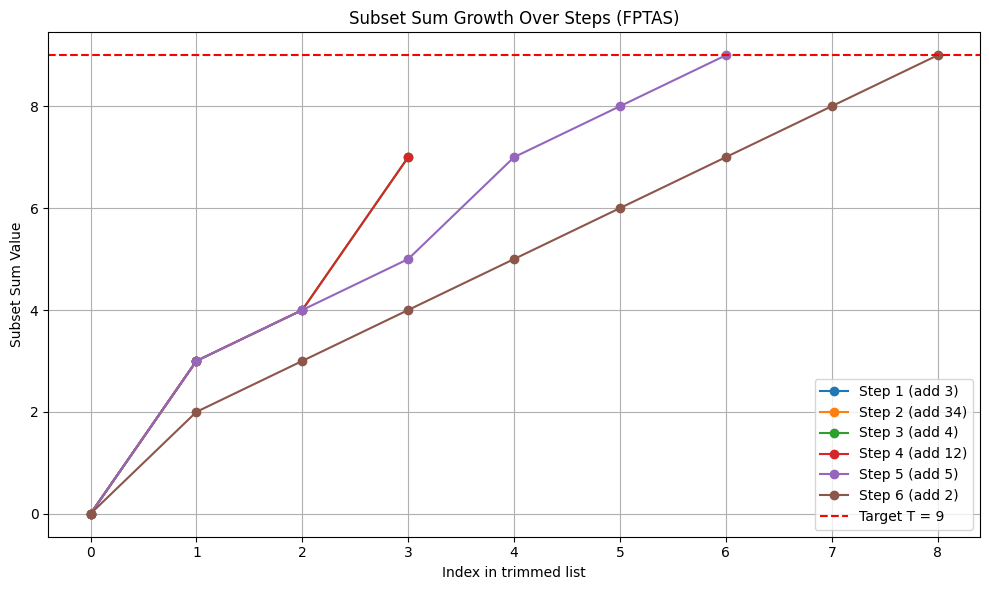

Approximate Subset Sum (ε = 0.01): 9
Subset: [3, 4, 2]


In [6]:
if __name__ == "__main__":
    S = [3, 34, 4, 12, 5, 2]
    T = 9
    epsilon = 0.01  # 99% accuracy

    max_sum, subset = approx_subset_sum_with_subset_graph(S, T, epsilon)
    print("Approximate Subset Sum (ε = 0.01):", max_sum)
    print("Subset:", subset)